In [8]:
import math
import matplotlib 
import random
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import networkx as nx

In [49]:
ProbaProfils= {"classique":0.4,"marginal":0.3,"vieux":0.1,"geek":0.2}

def listprofil(probaprofil,n):
    """dict[str:int]*int->list[str]
    renvoie une liste de n personnes avec leur profil"""
    LR=[]
    nbr=[]
    for i in probaprofil.keys():
        nbr=nbr+[i for n in range(round(n*probaprofil[i]))]
    if len(nbr) != n:
        for i in range(n-len(nbr)):
            nbr.append(random.choice([i for i in probaprofil.keys()]))
    for i in range(n):
        a=random.choice(nbr)
        LR.append(a)
        nbr.remove(a)

    return LR
      


def nbr_amis(personne):
    """list[int]->int
    renvoie le nombre d'amis d'une personne à partir d'une liste de 0 et de 1"""
    nbr=0
    for elt in personne:
        if elt==1:
            nbr+=1
    return nbr

def choisir_amis(no_personne,n,nbr_moy):
    """int*int->list[int]
    renvoie une liste avec les amis choisis d'une personne"""
    LR=[]
    exclusion= [i for i in range(n) if i!=no_personne]
    last=0
    for elt in range(nbr_moy):
        last=random.choice(exclusion)
        LR.append(last)
        exclusion.remove(last)
    return LR
ProbaProfils= {"classique":0.4,"marginal":0.3,"vieux":0.1,"geek":0.2}
ProfilSpecs={"classique":(2/13,0.3,0.7),
             "marginal":(1/15,0.1,0.4),
             "vieux":(1/13,0.6,0.9),
             "geek":(3/13,0.7,1)} #format nom:(proportion d'amis, proba d'envoyer, proba de recevoir)

def simple_graph_generator_profils(listprofils, profilspecs):
    """list[str]*dict[str:tuple[int;int;int]]->list[list[int]]
    renvoie une matrice liaison en tenant compte des différents profils"""
    n=len(listprofils)
    profils=list(profilspecs.keys())
    LR=[[0 for elt in range(n)] for i in range(n)]
    nbr_moy=dict((i,round(n*ProfilSpecs[i][0])) for i in profils)
    for elt in range(n):
        amis=choisir_amis(elt,n,nbr_moy[listprofils[elt]])
        for elt2 in amis:
            tolerance=random.randint(0,round(n*1/50))
            if nbr_amis(LR[elt]) <= nbr_moy[listprofils[elt]]+tolerance and \
                nbr_amis(LR[elt2]) <= nbr_moy[listprofils[elt2]]+tolerance:
                LR[elt][elt2]=1
                LR[elt2][elt]=1
    return LR
listeprofils=listprofil(ProbaProfils,10)
            
ProbaProfils= {"classique":0.4,"marginal":0.3,"vieux":0.1,"geek":0.2}
ProfilSpecs={"classique":(2/13,0.3,0.7),  #(proportion d'amis, probabilités de partager, proba de recevoir)
             "marginal":(1/15,0.1,0.4),
             "vieux":(1/13,0.6,0.9),
             "geek":(4/13,0.7,1)}
color={"classique":'blue',"marginal":'yellow',"vieux":'green',"geek":'red'}
listeprofils=listprofil(ProbaProfils,50)
def amis_total(l):
    """"""
    n=len(l)
    amistotal=dict((i,0)for i in range(n))
    for i in range(len(l)):
        amistotal[i]=nbr_amis(l[i])
    return amistotal
def draw_liaisons_profils(l,listeprofils):
    """list[list[int]]->NoneType
    renvoi le dessin des liaisons à partir de la matrice liaisons"""
    G=nx.Graph()
    i=len(l)
    G.add_nodes_from([i for i in range(i)])
    for elt in range(len(l)):
        for elt2 in range(len(l[elt])):
            if l[elt][elt2]==1:
                G.add_edge(elt,elt2)
    pos = nx.spring_layout(G)
    #nx.draw_networkx_nodes(G, pos=pos, node_color=node_colors, nodesize=100, alpha = 0.7)
    #nx.draw_networkx_edges(G, pos=pos)
    return G
listep=listprofil(ProbaProfils,100)
mat=simple_graph_generator_profils(listep, ProfilSpecs)
print(amis_total(mat))

{0: 34, 1: 10, 2: 18, 3: 34, 4: 18, 5: 18, 6: 10, 7: 11, 8: 18, 9: 18, 10: 34, 11: 18, 12: 11, 13: 18, 14: 18, 15: 10, 16: 18, 17: 9, 18: 33, 19: 10, 20: 18, 21: 32, 22: 18, 23: 11, 24: 18, 25: 10, 26: 10, 27: 10, 28: 18, 29: 18, 30: 34, 31: 18, 32: 34, 33: 31, 34: 28, 35: 10, 36: 18, 37: 18, 38: 18, 39: 11, 40: 18, 41: 32, 42: 10, 43: 10, 44: 10, 45: 17, 46: 11, 47: 7, 48: 28, 49: 18, 50: 10, 51: 32, 52: 18, 53: 18, 54: 10, 55: 17, 56: 17, 57: 18, 58: 26, 59: 17, 60: 11, 61: 10, 62: 26, 63: 23, 64: 18, 65: 9, 66: 11, 67: 18, 68: 9, 69: 18, 70: 10, 71: 12, 72: 10, 73: 17, 74: 10, 75: 10, 76: 18, 77: 14, 78: 8, 79: 21, 80: 10, 81: 10, 82: 24, 83: 17, 84: 17, 85: 10, 86: 18, 87: 14, 88: 18, 89: 10, 90: 10, 91: 10, 92: 10, 93: 21, 94: 10, 95: 13, 96: 10, 97: 11, 98: 18, 99: 17}


In [10]:
def mat_to_pos(liaisons):
    """list[list[int]]->dict[int:list[int]]"""
    n=len(liaisons)
    DR=dict((i,[])for i in range(n))
    amis=[nbr_amis(i) for i in liaisons]
    amis_max=max(amis)
    for elt in range(n):
        rdm=elt*random.random()
        decalage=1-(nbr_amis(liaisons[elt])/amis_max)
        rdm1=random.choice(["no","ne","se","so"]) #nord ouest, nord est, sud ouest, sud est.
        rdm2=random.choice([-1,1])*random.random()*1/(nbr_amis(liaisons[elt])/50)
        rdm2bis=random.choice([-1,1])*random.random()*1/(nbr_amis(liaisons[elt])/50)
        if rdm1=="no":
            DR[elt]=[-decalage+rdm2,decalage+rdm2bis]
        elif rdm1=="ne":
            DR[elt]=[decalage+rdm2,decalage+rdm2bis]
        elif rdm1=="se":
            DR[elt]=[decalage+rdm2,-decalage+rdm2bis]
        elif rdm1=="so":
            DR[elt]=[-decalage+rdm2,-decalage+rdm2bis]
    return DR
    
listep=listprofil(ProbaProfils,100)
mat=simple_graph_generator_profils(listep, ProfilSpecs)
#mat_to_pos(mat)

In [11]:
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio
import os
import numpy as np            
import plotly.plotly as py
import networkx as nx
def graph_propre_profils(n):
    listep=listprofil(ProbaProfils,n)
    mat=simple_graph_generator_profils(listep, ProfilSpecs)
    G=draw_liaisons_profils(mat,listep)
    pos=nx.spring_layout(G)
    edge_trace = go.Scatter(
        x=[],
        y=[],
        line=dict(width=0.5,color='#888'),
        hoverinfo='none',
        mode='lines')

    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_trace['x'] += tuple([x0, x1, None])
        edge_trace['y'] += tuple([y0, y1, None])

    node_trace = go.Scatter(
        x=[],
        y=[],
        text=[],
        mode='markers',
        hoverinfo='text',
        marker=dict(
            showscale=True,
            # colorscale options
            #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
            #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
            #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
            colorscale='YlOrRd',
            reversescale=True,
            color=[],
            size=10,
            colorbar=dict(
                thickness=15,
                title='Amis',
                xanchor='left',
                titleside='right'
            ),
            line=dict(width=2)))
    print(G.nodes)
    for node in pos:
        x = pos[node][0]
        y = pos[node][1]
        node_trace['x'] += tuple([x])
        node_trace['y'] += tuple([y])


    for node, adjacencies in enumerate(G.adjacency()):
        node_trace['marker']['color']+=tuple([len(adjacencies[1])])
        node_info ='Type: ' + listep[node]+' , # of friends: '+str(len(adjacencies[1]))
        node_trace['text']+=tuple([node_info])

    fig = go.Figure(data=[edge_trace, node_trace],
                 layout=go.Layout(
                    title='<br>Représentation d\'un Réseau d\'amis',
                    titlefont=dict(size=16),
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20,l=5,r=5,t=40),
                    annotations=[ dict(
                        text="Population de personnes utilisant les réseaux sociaux et leur liaisons entre eux.",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002 ) ],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))
    if not os.path.exists('images'):
        os.mkdir('images')
    pio.write_image(fig, 'images/fig1.png')

    return py.iplot(fig, filename='networkx')
graph_propre_profils(68)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]
High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~tom17041/0 or inside your plot.ly account where it is named 'networkx'


# Transmission Graphique

In [12]:
def passage_info_simple_profils(liaisons,info,stock_info,nbr,profilspecs,listeprofils):
    """list[list[int]]*list[int]*list[int]*int->list[int]
    Transmet l'information à la géneration suivante"""
    new_info=[0 for i in info]
    new_stock_info=[i for i in stock_info]
    for i in range(len(info)):
        if info[i]==1:
            for a in range(len(liaisons[i])):
                rdm=random.random()
                if liaisons[i][a]==1 and rdm<profilspecs[listeprofils[i]][1]: #a modifier pour modèle complexe
                    rdm=random.random()
                    if new_stock_info[a]<1 and rdm<profilspecs[listeprofils[i]][2]: #a modifier pour modèle complexe
                        new_info[a]=1
                        nbr+=1
                        new_stock_info[a]+=1
                
    return new_info,new_stock_info,nbr

def donneur_info(population,donneur):
    """int*int->list[int]+list[int]
    donne la matrice info"""
    info=[0 if i!= donneur else 1 for i in range(population)]
    
    return info

def stock_evolution_profils(liaisons,info,stock_info,nbr,profilspecs, listeprofils, n):
    """list[list[int]]*list[int]*list[int]*int*int->list[list[int]]
   renvoie la liste des personnes ayant eu l'information depuis le début"""
    Ltemp=[i for i in info]
    stocktemp=[i for i in stock_info]
    listock=list([list(stocktemp)])
    nbrtemp=nbr
    NBR=[1]
    for i in range(n):
        temp=passage_info_simple_profils(liaisons,Ltemp,stocktemp,nbrtemp, ProfilSpecs, listeprofils)
        Ltemp=[i for i in temp[0]]
        stocktemp=[i for i in temp[1]]
        listock.append(stocktemp)
        nbrtemp=temp[2]
    return listock
Profiltypes= {"classique":0.4, "marginal":0.2,"vieux":0.2,"geek":0.2}
ProfilSpecs={"classique":(1/20,0.4,0.6),
             "marginal":(1/22,0.2,0.4),
             "vieux":(1/18,0.4,0.7),
             "geek":(1/17,0.5,0.8)}
listeprofils=listprofil(Profiltypes, 50)
generate=simple_graph_generator_profils(listeprofils, ProfilSpecs)
donneur=donneur_info(50,listeprofils.index("geek"))
stock=[i for i in donneur]
listevo=stock_evolution_profils(generate,donneur,stock,1,ProfilSpecs, listeprofils, 10)
print(listevo)

[[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [13]:
def list_to_color(liste):
    """"""
    color=[]
    for i in liste:
        if i ==1:
            color.append("red")
        else:
            color.append("white")
    return color

def clean_images(dossier):
    """str->None
    supprime les images d'un fichier"""
    for filename in os.listdir(dossier):
        if filename.endswith('.png'):
            path=str(dossier+"/"+filename)
            os.unlink(path)
    return None


In [51]:
Profiltypes= {"classique":0.4, "marginal":0.2,"vieux":0.2,"geek":0.2}
ProfilSpecs={"classique":(1/20,0.4,0.6),
             "marginal":(1/22,0.2,0.4),
             "vieux":(1/18,0.4,0.7),
             "geek":(1/17,0.5,0.8)}
def graph_propre_profils_transmit(n,gen):
    listep=listprofil(ProbaProfils,n)
    mat=simple_graph_generator_profils(listep, ProfilSpecs)
    donneur=donneur_info(n,listep.index("classique"))
    stock=[i for i in donneur]
    listevo=stock_evolution_profils(mat,donneur,stock,1,ProfilSpecs, listep, gen)
    print(listevo)
    clean_images("images")
    G=draw_liaisons_profils(mat,listep)
    pos=nx.spring_layout(G)
    edge_trace = go.Scatter(
        x=[],
        y=[],
        line=dict(width=0.5,color='#888'),
        hoverinfo='none',
        mode='lines')
    
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_trace['x'] += tuple([x0, x1, None])
        edge_trace['y'] += tuple([y0, y1, None])
    for elt in range(len(listevo)):

        node_trace = go.Scatter(
            x=[],
            y=[],
            text=[],
            mode='markers',
            hoverinfo='text',
            marker=dict(
                showscale=False,
                # colorscale options
                #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
                #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
                #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
                #colorscale='YlOrRd',
                reversescale=True,
                color=list_to_color(listevo[elt]),
                size=10,
                line=dict(width=2)))
        for node in pos:
            x = pos[node][0]
            y = pos[node][1]
            node_trace['x'] += tuple([x])
            node_trace['y'] += tuple([y])


        for node, adjacencies in enumerate(G.adjacency()):
            node_trace['marker']['color']+=tuple([len(adjacencies[1])])
            node_info ='Type: ' + listep[node]+' , # of friends: '+str(len(adjacencies[1]))
            node_trace['text']+=tuple([node_info])

        fig = go.Figure(data=[edge_trace, node_trace],
                     layout=go.Layout(
                        title='<br>Network graph made with Python',
                        titlefont=dict(size=16),
                        showlegend=False,
                        hovermode='closest',
                        margin=dict(b=20,l=5,r=5,t=40),
                        annotations=[ dict(
                            text="Population de personnes utilisant les réseaux sociaux et leur liaisons entre eux.",
                            showarrow=False,
                            xref="paper", yref="paper",
                            x=0.005, y=-0.002 ) ],
                        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))
        if not os.path.exists('images'):
            os.mkdir('images')
        pio.write_image(fig, 'images/fig_'+str(elt)+'.png')
    print(listevo[-1])
    return py.iplot(fig, filename='networkx')
        
graph_propre_profils_transmit(100,8)

[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [52]:

import sys
import datetime
import imageio
from os import listdir
from os.path import isfile, join
from IPython.display import Image
from IPython.display import display

def tri(fichier):
    """str->int
    récupère le numéro d'un fichier, utile pour la création du gif"""
    nbr=0
    nombres=set(str(i) for i in range(10))
    k=0
    boule=0
    for i in range(len(fichier)):
        if fichier[i] in nombres and boule==0:
            k=i
            boule=1
        elif fichier[i] in nombres:
            nbr=int(fichier[k:i+1])
    return nbr
            

def create_gif(duration):
    images = []
    filenames = sorted(["images/"+f for f in listdir("images") if isfile("images/"+f)], key=tri)
    output_file = 'Gif-%s.gif' % datetime.datetime.now().strftime('%Y-%M-%d-%H-%M-%S')
    for filename in filenames:
        images.append(imageio.imread(filename))
    imageio.mimsave(output_file, images, duration=duration)

    display(Image(url=output_file))




create_gif(0.5)

# avec fake-news

In [34]:
ProfilTypes= {"classique":0.39,"marginal":0.3,"vieux":0.1,"geek":0.2,"media":0.01}
def listprofil(probaprofil,n):
    """dict[str:int]*int->list[str]
    renvoie une liste de n personnes avec leur profil"""
    LR=[]
    #nbr={"classique":round(n*probaprofil["classique"]),
       #  "marginal":round(n*probaprofil["marginal"]),
        #"vieux":round(n*probaprofil["vieux"]),
        #"geek":round(n*probaprofil["geek"]),
        #"media":round(n*probaprofil["media"])}
    nbr=[]
    for i in probaprofil.keys():
        nbr=nbr+[i for n in range(round(n*probaprofil[i]))]
    for i in range(n):
        a=random.choice(nbr)
        LR.append(a)
        nbr.remove(a)
        
    if ("media" in LR) == False:
        LR.remove("classique")
        LR.append("media")
      
    return LR

def mat_complotiste(listprofil):
    """renvoie la liste des complotistes"""
    L_complotiste=[0 for i in range(len(listprofil))]
    for e in range(len(listprofil)):
        rdm=random.random()
        if rdm<ProfilSpecs[listprofil[e]][5]:
            L_complotiste[e]=1
    return L_complotiste

def indice_media(listprofils):
    """renvoie liste indice medias"""
    Li=[]
    for i in range(len(listprofils)):
        if listprofils[i]=="media":
            Li.append(i)
    return Li


import math
def nbr_amis(personne):
    """list[int]->int
    renvoie le nombre d'amis d'une personne à partir d'une liste de 0 et de 1"""
    nbr=0
    for elt in personne:
        if elt==1:
            nbr+=1
    return nbr

def choisir_amis(no_personne,n,nbr_moy):
    """int*int->list[int]
    renvoie une liste avec les amis choisis d'une personne"""
    LR=[]
    exclusion= [i for i in range(n) if i!=no_personne]
    last=0

    for elt in range(nbr_moy):
        last=random.choice(exclusion)
        LR.append(last)
        exclusion.remove(last)
    
    return LR

Profiltypes= {"classique":0.39,"marginal":0.25,"vieux":0.15,"geek":0.2,"media":0.01}
ProfilSpecs={"classique":(5/50,0.3,0.7,0.3,0),
             "marginal":(2/50,0.1,0.4,0.2,0),
             "vieux":(3/50,0.6,0.9,0.5,0),
             "geek":(7/50,0.7,1,0.4,0),
            "media":(8/50,0.2,1,1,0.8)} #format nom:(proportion d'amis, proba d'envoyer,pba de recevoir,proba d'envoyer la contre-info, proba de contredire l'info)
def simple_graph_generator_profils(listprofils, profilspecs):
    """list[str]*dict[str:tuple[int;int;int]]->list[list[int]]
    renvoie une matrice liaison en tenant compte des différents profils"""
    n=len(listprofils)
    profils=list(profilspecs.keys())
    LR=[[0 for elt in range(n)] for i in range(n)]
    nbr_moy=dict((i,round(n*ProfilSpecs[i][0])) for i in profils) 
    for elt in range(n):
        amis=choisir_amis(elt,n,nbr_moy[listprofils[elt]])
        for elt2 in amis:
            #tolerance=random.randint(0,n*1/10)
            tolerance=0
            if nbr_amis(LR[elt]) <= nbr_moy[listprofils[elt]]+tolerance and \
                nbr_amis(LR[elt2]) <= nbr_moy[listprofils[elt2]]+tolerance:
                LR[elt][elt2]=1
                LR[elt2][elt]=1
    return LR




def donneur_info(population,donneur):
    """int*int->list[int]+list[int]
    donne les matrices info et stock_info"""
    info=[0 if i!= donneur else 1 for i in range(population)]
    return info



In [17]:
ProfilSpecs={"classique":(5/50,0.3,0.7,0.3,0),
             "marginal":(2/50,0.1,0.4,0.2,0),
             "vieux":(3/50,0.6,0.9,0.5,0),
             "geek":(7/50,0.7,1,0.4,0),
            "media":(8/50,0.2,1,1,0.8)}


def passage_info_profils_avant(liaisons,info,stock_info,nbr,profilspecs,listeprofils):
    """list[list[int]]*list[int]*list[int]*int->list[int]
    Transmet l'information à la géneration suivante"""
    new_info=[0 for i in info]
    new_stock_info=[i for i in stock_info]
    nbr_new=nbr
    for i in range(len(info)):
        if info[i]==1:
            for a in range(len(liaisons[i])):
                rdm=random.random()
                if liaisons[i][a]==1 and rdm<profilspecs[listeprofils[i]][1]: #a modifier pour modèle complexe
                    rdm=random.random()
                    if new_stock_info[a]<1 and rdm<profilspecs[listeprofils[i]][2]: #a modifier pour modèle complexe
                        new_info[a]=1
                        nbr_new+=1
                        new_stock_info[a]+=1
                    elif rdm<profilspecs[listeprofils[i]][2]:
                        new_stock_info[a]+=1
                
    return new_info,new_stock_info,nbr_new



In [18]:
def verif_stock_info_media(stock_info,indice_media):
    """retourne true si un média a recu la fake news"""
    for i in indice_media:
        if stock_info[i]==1:
            return False
    return True


def passage_info_profils_apres(liaisons,info,stock_info,contre_info,stock_contre_info,nbr,nbr_contre,profilspecs,listeprofils):
    """list[list[int]]*list[int]*list[int]*int->list[int]
    Transmet l'information à la géneration suivante"""
    new_info=[0 for i in info]
    new_stock_info=[i for i in stock_info]
    new_stock_contre_info=[i for i in stock_contre_info]
    new_contre_info=[0 for i in info]
    new_nbr=nbr
    new_nbr_contre=nbr_contre
    nbr_contre2=0#correpond aux nb de personnes ayant déjà reçu la FN et qui recoivent la contre info
    complotiste=mat_complotiste(listeprofils)
    
    # passer la contre-info       
    for i in range(len(new_contre_info)):              #parcours de chaque personne
        if contre_info[i]==1:  #si la personne a la contre-info
            for a in range(len(liaisons[i])):  #on parcours les amis de cette personne
                rdm=random.random()
                if stock_info[i]==0 and complotiste[i]==0:                   #si cette personne n'a pas la FN 
                    if liaisons[i][a]==1 and rdm<profilspecs[listeprofils[i]][3]:
                        rdm=random.random()
                        if new_stock_contre_info[a]<1 and rdm<profilspecs[listeprofils[a]][2]: #si l'ami n'a jamais eu la contre info
                            new_contre_info[a]=1
                            if complotiste[a]==0:
                                new_nbr_contre+=1
                            new_stock_contre_info[a]+=1
                            if stock_info[a]>=1 and complotiste[a]==0:
                                nbr_contre2+=1
                        elif rdm<profilspecs[listeprofils[a]][2]:        #si l'ami a deja eu la contre info 
                            new_stock_contre_info[a]+=1
                    
                elif stock_info[i]>=1 and complotiste[i]==0:                    #si la personne a eu la FN
                    rdm=random.random()
                    if liaisons[i][a]==1 and rdm<profilspecs[listeprofils[i]][3]*1.25:#*connard
                        rdm=random.random()
                        if new_stock_contre_info[a]<1 and rdm<profilspecs[listeprofils[a]][2]: #si la personne n'a jamais eu la contre info
                            new_contre_info[a]=1
                            if complotiste[a]==0:
                                new_nbr_contre+=1
                            new_stock_contre_info[a]+=1
                            if stock_info[a]>=1 and complotiste[a]==0:
                                nbr_contre2+=1
                        elif rdm<profilspecs[listeprofils[a]][2]:        #si la personne a deja eu la contre info 
                            new_stock_contre_info[a]+=1                       
    new_nbr=new_nbr-nbr_contre2
                
     # passer la fake news (info)
    for i in range(len(info)): #on parcours chaque personne
        if info[i]==1:
            if stock_contre_info[i]==0 and complotiste[i]==0:
                for a in range(len(liaisons[i])): #parcours les amis de cette personne
                    rdm=random.random()
                    if liaisons[i][a]==1 and rdm<profilspecs[listeprofils[i]][1]:
                        rdm=random.random()
                        if new_stock_info[a]<1 and rdm<profilspecs[listeprofils[a]][2]: 
                            if new_stock_contre_info[a]>=1:
                                new_stock_info[a]+=1
                            else:
                                new_stock_info[a]+=1
                                new_info[a]=1
                                new_nbr+=1
                        elif rdm<profilspecs[listeprofils[a]][2]:      #si l'ami a deja recu l'info
                            new_stock_info[a]+=1
            elif complotiste[i]==1:
                for a in range(len(liaisons[i])): #parcours les amis de cette personne
                    rdm=random.random()
                    if liaisons[i][a]==1 and rdm<profilspecs[listeprofils[i]][1]*1.25:
                        rdm=random.random()
                        if new_stock_info[a]<1 and rdm<profilspecs[listeprofils[a]][2]: 
                            if new_stock_contre_info[a]>=1:
                                new_stock_info[a]+=1
                            else:
                                new_stock_info[a]+=1
                                new_info[a]=1
                                new_nbr+=1
                        elif rdm<profilspecs[listeprofils[a]][2]:      #si l'ami a deja recu l'info
                            new_stock_info[a]+=1
                            
                            
   
    return new_info, new_stock_info, new_contre_info, new_stock_contre_info, new_nbr, new_nbr_contre

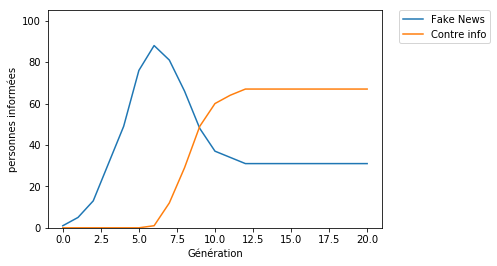

None


In [141]:
ProfilSpecs={"classique":(10/100,0.3,0.5,0.2,0,0.15),# % d'amis/envoyer/recevoir/envoyer contre-info/lancer contre-info
             "marginal":(8/100,0.2,0.4,0.1,0,0.15),
             "vieux":(9/100,0.4,0.7,0.2,0,0.15),
             "geek":(12/100,0.45,0.7,0.3,0,0.15),
            "media":(15/100,0.2,0.8,1,0.7,0)}
Profiltypes= {"classique":0.25,"marginal":0.15,"vieux":0.35,"geek":0.24,"media":0.01}

def plot_information(L_FN,L_contre_FN,taille):
    '''
    list[int]-> None
    Visualise l'évolution du opartage de l'information au cours du temps
    '''
    plt.figure()
    plt.plot(L_FN, label='Fake News')
    plt.plot(L_contre_FN, label= 'Contre info')
    plt.ylim(0,taille+5)
    plt.ylabel("personnes informées")
    plt.xlabel("Génération")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

    plt.show()
    return


listeprofils=listprofil(Profiltypes,100)
#print(listeprofils)
IndiceMedia=indice_media(listeprofils)
#print(IndiceMedia)
generate=simple_graph_generator_profils(listeprofils, ProfilSpecs)
donneur=donneur_info(100,listeprofils.index("geek"))
stock=[i for i in donneur]
final=passage_info_profils_fake_news_n_generations(generate,donneur,stock,1,ProfilSpecs,listeprofils,IndiceMedia,20)
L_FN=final[2]
L_contre_FN=final[3]
taille=100

print(plot_information(L_FN,L_contre_FN,taille))




In [21]:
mettre1= lambda x:[[1 if elt>=1 else 0 for elt in i] for i in x]
def passage_info_profils_fake_news_n_generations(liaisons,info,stock_info,nbr,\
                                                 profilspecs,listeprofils,liste_indice_media,n):
    """passe l'information sur n générations avec possibilité de contre info des médias"""
        
    stock_contre_info_temp=[0 for i in stock_info]
    contre_info_temp=[0 for i in info]
    nbr_temp=nbr
    info_temp=[i for i in info]
    stock_info_temp=[i for i in stock_info]
    NBR=[1]
    m=0
    listock_info=list([list(stock_info_temp)])
    listock_cinfo=list([list(stock_contre_info_temp)])
    rdm=random.random()
    while verif_stock_info_media(stock_info_temp,liste_indice_media) and m<n:
        temp=passage_info_profils_avant(liaisons,info_temp,stock_info_temp,nbr_temp, profilspecs, listeprofils)
        info_temp=[i for i in temp[0]]
        stock_info_temp=[i for i in temp[1]]
        listock_info.append(stock_info_temp)
        listock_cinfo.append([0 for i in stock_info_temp])
        nbr_temp=temp[2]
        NBR.append(nbr_temp)
        m+=1
    if m==n:
        NBR_contre=[0 for i in NBR]
        if len(listock_info) != len(listock_cinfo):
            listock_cinfo.remove(listock_cinfo[0])
        return mettre1(listock_info) ,mettre1(listock_cinfo) ,NBR, NBR_contre  
    NBR_contre=[0 for i in NBR]
      
    rdm=random.random()
    c=0
    for e in range(len(liste_indice_media)):
        if rdm<profilspecs["media"][4]:
            stock_contre_info_temp[liste_indice_media[e]]=1
            contre_info_temp[liste_indice_media[e]]=1
            c+=1
    nbr_contre_temp=c 
    listock_cinfo.append(stock_contre_info_temp)
    listock_info.append(stock_info_temp)
    if c!=0:
        NBR_contre.remove(0)
        NBR_contre.append(c)
        for i in range(m,n):           #liaisons,info,stock_info,contre_info,stock_contre_info,nbr,nbr_contre,profilspecs,listeprofils
            temp2=passage_info_profils_apres(liaisons,info_temp,stock_info_temp,contre_info_temp,stock_contre_info_temp,nbr_temp,nbr_contre_temp,profilspecs,listeprofils)
            info_temp=temp2[0]
            stock_info_temp=temp2[1]
            contre_info_temp=[i for i in temp2[2]]
            stock_contre_info_temp=[i for i in temp2[3]]
            listock_info.append(stock_info_temp)
            listock_cinfo.append(stock_contre_info_temp)
            nbr_temp=temp2[4]       
            nbr_contre_temp=temp2[5]

            NBR.append(nbr_temp)
            NBR_contre.append(nbr_contre_temp)
    else:
        for i in range(m,n):
            temp=passage_info_profils_avant(liaisons,info_temp,stock_info_temp,nbr_temp, profilspecs, listeprofils)
            info_temp=[i for i in temp[0]]
            stock_info_temp=[i for i in temp[1]]
            listock_info.append(stock_info_temp)
            listock_cinfo.append([0 for i in stock_info_temp])
            nbr_temp=temp[2]
            NBR.append(nbr_temp)
            NBR_contre.append(0)
            
    if len(listock_info) != len(listock_cinfo):
        listock_cinfo.remove(listock_cinfo[0])
    return mettre1(listock_info), mettre1(listock_cinfo), NBR, NBR_contre

In [23]:



listeprofils=listprofil(Profiltypes,100)
IndiceMedia=indice_media(listeprofils)
#print(IndiceMedia)
generate=simple_graph_generator_profils(listeprofils, ProfilSpecs)
donneur=donneur_info(100,listeprofils.index("geek"))
stock=[i for i in donneur]
final1=passage_info_profils_fake_news_n_generations(generate,donneur,stock,1,ProfilSpecs,listeprofils,IndiceMedia,90)


In [24]:
def simple_graph_generator_profils_FN(listprofils, profilspecs):
    """list[str]*dict[str:tuple[int;int;int]]->list[list[int]]
    renvoie une matrice liaison en tenant compte des différents profils"""
    n=len(listprofils)
    profils=list(profilspecs.keys())
    LR=[[0 for elt in range(n)] for i in range(n)]
    nbr_moy=dict((i,round(n*ProfilSpecs[i][0])) for i in profils) 
    for elt in range(n):
        amis=choisir_amis(elt,n,nbr_moy[listprofils[elt]])
        for elt2 in amis:
            #tolerance=random.randint(0,n*1/10)
            tolerance=0
            if nbr_amis(LR[elt]) <= nbr_moy[listprofils[elt]]+tolerance and \
                nbr_amis(LR[elt2]) <= nbr_moy[listprofils[elt2]]+tolerance:
                LR[elt][elt2]=1
                LR[elt2][elt]=1
    return LR

def list_to_colorv2(stocklist):
    """"""
    color=[]
    for i in range(len(stocklist[1])):
        if stocklist[1][i]==1:
            color.append("lightgreen")
        elif stocklist[0][i]==1:
            color.append("red")
        else:
            color.append("white")
        
        
    return color


In [33]:
Profiltypes= {"classique":0.39,"marginal":0.25,"vieux":0.15,"geek":0.2,"media":0.01}
ProfilSpecs={"classique":(10/100,0.3,0.5,0.3,0,0.2),# % d'amis/envoyer/recevoir/envoyer contre-info/lancer contre-info
             "marginal":(8/100,0.2,0.4,0.2,0,0.2),
             "vieux":(9/100,0.4,0.7,0.2,0,0.2),
             "geek":(12/100,0.45,0.7,0.4,0,0.2),
            "media":(30/100,0.2,0.8,1,0.7,0)}


len0:  17 len1:  17
len0:  17 len1:  17 elt:  0
len0:  17 len1:  17 elt:  1
len0:  17 len1:  17 elt:  2
len0:  17 len1:  17 elt:  3
len0:  17 len1:  17 elt:  4
len0:  17 len1:  17 elt:  5
len0:  17 len1:  17 elt:  6
len0:  17 len1:  17 elt:  7
len0:  17 len1:  17 elt:  8
len0:  17 len1:  17 elt:  9
len0:  17 len1:  17 elt:  10
len0:  17 len1:  17 elt:  11
len0:  17 len1:  17 elt:  12
len0:  17 len1:  17 elt:  13
len0:  17 len1:  17 elt:  14
len0:  17 len1:  17 elt:  15
len0:  17 len1:  17 elt:  16
High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~tom17041/0 or inside your plot.ly account where it is named 'networkx'


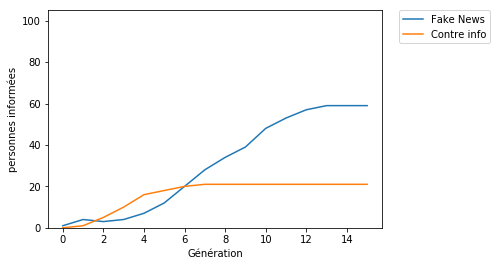

None


In [47]:
def graph_propre_profils_FN_transmit(liaisons,listeprof,stock_infos):

    mat=liaisons
    listevo=(stock_infos[0],stock_infos[1])
    #print(listevo)
    clean_images("images")
    G=draw_liaisons_profils(mat,listeprof)
    pos=nx.spring_layout(G)
    edge_trace = go.Scatter(
        x=[],
        y=[],
        line=dict(width=0.5,color='#888'),
        hoverinfo='none',
        mode='lines')
    
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_trace['x'] += tuple([x0, x1, None])
        edge_trace['y'] += tuple([y0, y1, None])
    for elt in range(len(listevo[0])):
        print("len0: ",len(listevo[0]),"len1: ", len(listevo[1]),"elt: ",elt)
        #if len(listevo[1]) < len(listevo[0]):
            #print(listevo[1])
        node_trace = go.Scatter(
            x=[],
            y=[],
            text=[],
            mode='markers',
            hoverinfo='text',
            marker=dict(
                showscale=False,
                # colorscale options
                #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
                #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
                #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
                #colorscale='YlOrRd',
                reversescale=True,
                color=list_to_colorv2((listevo[0][elt],listevo[1][elt])),
                size=10,
                line=dict(width=2)))
        for node in pos:
            x = pos[node][0]
            y = pos[node][1]
            node_trace['x'] += tuple([x])
            node_trace['y'] += tuple([y])


        for node, adjacencies in enumerate(G.adjacency()):
            node_trace['marker']['color']+=tuple([len(adjacencies[1])])
            node_info ='Type: ' + listeprof[node]+' , # of friends: '+str(len(adjacencies[1]))
            node_trace['text']+=tuple([node_info])

        fig = go.Figure(data=[edge_trace, node_trace],
                     layout=go.Layout(
                        title='<br>Network graph made with Python',
                        titlefont=dict(size=16),
                        showlegend=False,
                        hovermode='closest',
                        margin=dict(b=20,l=5,r=5,t=40),
                        annotations=[ dict(
                            text="Population de personnes utilisant les réseaux sociaux et leur liaisons entre eux.",
                            showarrow=False,
                            xref="paper", yref="paper",
                            x=0.005, y=-0.002 ) ],
                        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))
        if not os.path.exists('images'):
            os.mkdir('images')
        pio.write_image(fig, 'images/fig_'+str(elt)+'.png')
    return py.iplot(fig, filename='networkx')
listeprofils=listprofil(Profiltypes,100)
IndiceMedia=indice_media(listeprofils)
generate=simple_graph_generator_profils_FN(listeprofils, ProfilSpecs)
donneur=donneur_info(100,listeprofils.index("geek"))
stock=[i for i in donneur]
final1=passage_info_profils_fake_news_n_generations(generate,donneur,stock,1,ProfilSpecs,listeprofils,IndiceMedia,15)
print("len0: ",len(final1[0]),"len1: ", len(final1[1]))
graph=graph_propre_profils_FN_transmit(generate,listeprofils,final1)
print(plot_information(final1[2],final1[3],taille))
create_gif(0.75)

